In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import datetime
import imageio as img

In [17]:
#Constants
#NOTE: Can only do three hours at a time

start_y = '2018'                                        #Format: YYYY(UTC-Relative)
start_m = '05'                                          #Format: MM(UTC-Relative)
start_d =  '20'                                         #Format: DD(UTC-Relative)

start_h = '02'                                         #Format: HH (UTC-Relative)
start_M = '10'                                          #Format: MM (UTC-Relative)


end_y = '2018'                                          #Format: YYYY(UTC-Relative)
end_m = '05'                                            #Format: MM(UTC-Relative)
end_d =  '20'                                           #Format: DD(UTC-Relative)

end_h = '07'                                            #Format: HH (UTC-Relative)
end_M = '00'                                            #Format: MM (UTC-Relative)


file_location = '/localdata/cases/20180519/GLM_data/' #Location of the data that you are pulling from
file_name_start = 'GLM-00-00_'                          #First part of the file name before the time
file_name_end = '_60_1src_056urad-dx_'                  #Last part of the file name after the time
var_name = 'flash_extent'                               #Variable that is used in the file name
data_name = 'flash_extent_density'                      #Variable that is used to pull the data from the netCDF file
data_full_name = 'Flash Extent Density'
file_type = '.nc'                                       #Datatype for netCDF file
save_location = 'FED_pics/'                              #Name of a premade folder to save the data to

bounds = np.arange(0, 35, 5)                            #Bounds for the colorbar

In [18]:
#Setting the start and end times
start_time = start_y + start_m + start_d + start_h + start_M                       
end_time = end_y + end_m + end_d + end_h + end_M

#Creating a list of start and end times to use for the loop and for plotting
time = pd.PeriodIndex(start = start_time, end = end_time, freq='T')
time_ymd = time.strftime('%Y%m%d')
time_hms = time.strftime('%H%M%S')
time_hm = time.strftime('%H%M')

time_Y = time.strftime('%Y')
time_m = time.strftime('%m') #month
time_D = time.strftime('%D')
time_H = time.strftime('%H')
time_M = time.strftime('%M') #Minute
time_S = time.strftime('%S')

#Used for the timeseries
timeseries = time.to_timestamp()
#timeseries = np.array([datetime.datetime(int(start_y), int(start_m), int(start_d), i, int(start_M)) for i in )])

In [19]:
#Creating an array of file_names using the start_time and end_time

i = 0
file_names = np.empty([0])
while i < len(time):
    name = file_location + file_name_start + time_ymd[i] + '_' + time_hms[i]+ file_name_end + var_name + file_type
    file_names = np.append(file_names, name)
    i += 1

In [20]:
#Setting the locations to pull the data from
x_locs = np.arange(1600,1851,1)
y_locs = np.arange(740,811,1)

In [21]:
#Pulling the maximum average group area from each time-interval
k = 0
max_data = np.empty([0])
while k < len(time):
    nc_file = nc.Dataset(file_names[k],'r')
    GLM_var = nc_file.variables[data_name][:,:]
    GLM_var = np.squeeze(GLM_var)
    GLM_var[GLM_var==0] = np.nan
    
    x = nc_file.variables['x'][:] 
    y = nc_file.variables['y'][:]
    
    GLM_iso_var = np.ones((len(x),len(y)))*np.nan
    
    for i in x_locs:
        for j in y_locs:
            GLM_iso_var[i,j] = GLM_var[i,j]
    
    max_data = np.append(max_data, np.nanmax(GLM_iso_var))
    k += 1

/localdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: All-NaN slice encountered


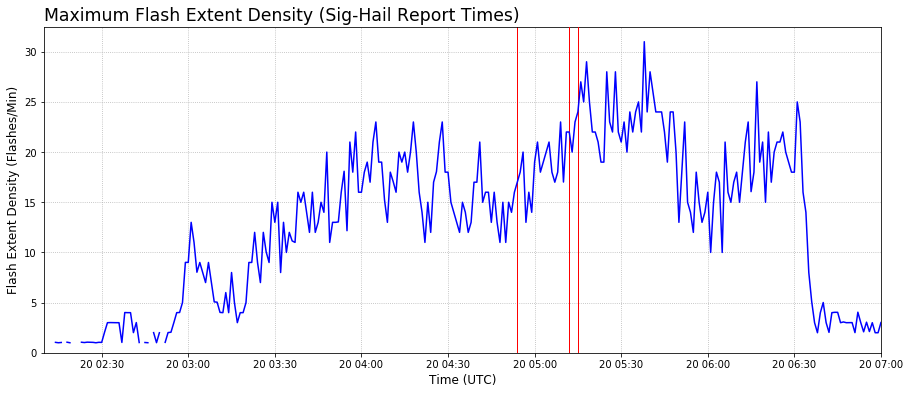

In [22]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,1,1)

ax1.plot(timeseries, max_data, color='b', zorder=5)
ax1.grid(True, linestyle=':', zorder=1)
ax1.axvline(pd.Timestamp('2018-05-20 04:54'), color='r', linewidth='1', zorder=2)
ax1.axvline(pd.Timestamp('2018-05-20 05:12'), color='r', linewidth='1', zorder=3)
ax1.axvline(pd.Timestamp('2018-05-20 05:15'), color='r', linewidth='1', zorder=4)
    
ax1.set_ylim(0,)
ax1.set_xlim(pd.Timestamp(timeseries[0]),pd.Timestamp(timeseries[-1]))
plt.title('Maximum Flash Extent Density (Sig-Hail Report Times)', fontsize='xx-large', loc='left')
ax1.set_xlabel('Time (UTC)', fontsize='large')
ax1.set_ylabel('Flash Extent Density (Flashes/Min)', fontsize='large')

plt.show()